In [3]:
from scipy import integrate
import pandas as pd
import os
import matplotlib.pyplot as plt
import glob

from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter, landscape
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
import os
# Define the title for the entire PDF
pdf_title = "15h_up_50mM_DAB2_150mM_NaCl_1DCVJ_2024april13"
# Define the base directory
base_dir = '/home/jwm/data/fluorescence_plots/'
# Construct the figure directory path
figure_dir = os.path.join(base_dir, pdf_title)
# Ensure the figure directory exists
os.makedirs(figure_dir, exist_ok=True)# Directory for joined pdfs
# Directory for joined pdfs
output_dir = '/home/jwm/data/fluorescence_plots/fluorescence_data_overview_21_may_2024/'
os.makedirs(output_dir, exist_ok=True)


In [48]:
def current_path(): 
    print("Current working directory before") 
    print(os.getcwd()) 
    print() 
current_path() 
os.chdir('/home/jwm/data/JASCO_FP_6500_Spectrofluorometer/2024april13_50mM_DAB2_418_630_150mM_NaCl_1DCVJ_slow_hysteresis/') 
current_path()

Current working directory before
/home/jwm

Current working directory before
/home/jwm/data/JASCO_FP_6500_Spectrofluorometer/2024april26_50mM_DAB2_418_630_150mM_NaCl_1uMThT_slow_hysteresis



In [5]:
# Load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import glob

/home/jwm/data/fluorescence_plots/15h_up_50mM_DAB2_150mM_NaCl_1DCVJ_2024april13/raw_spectra.svg


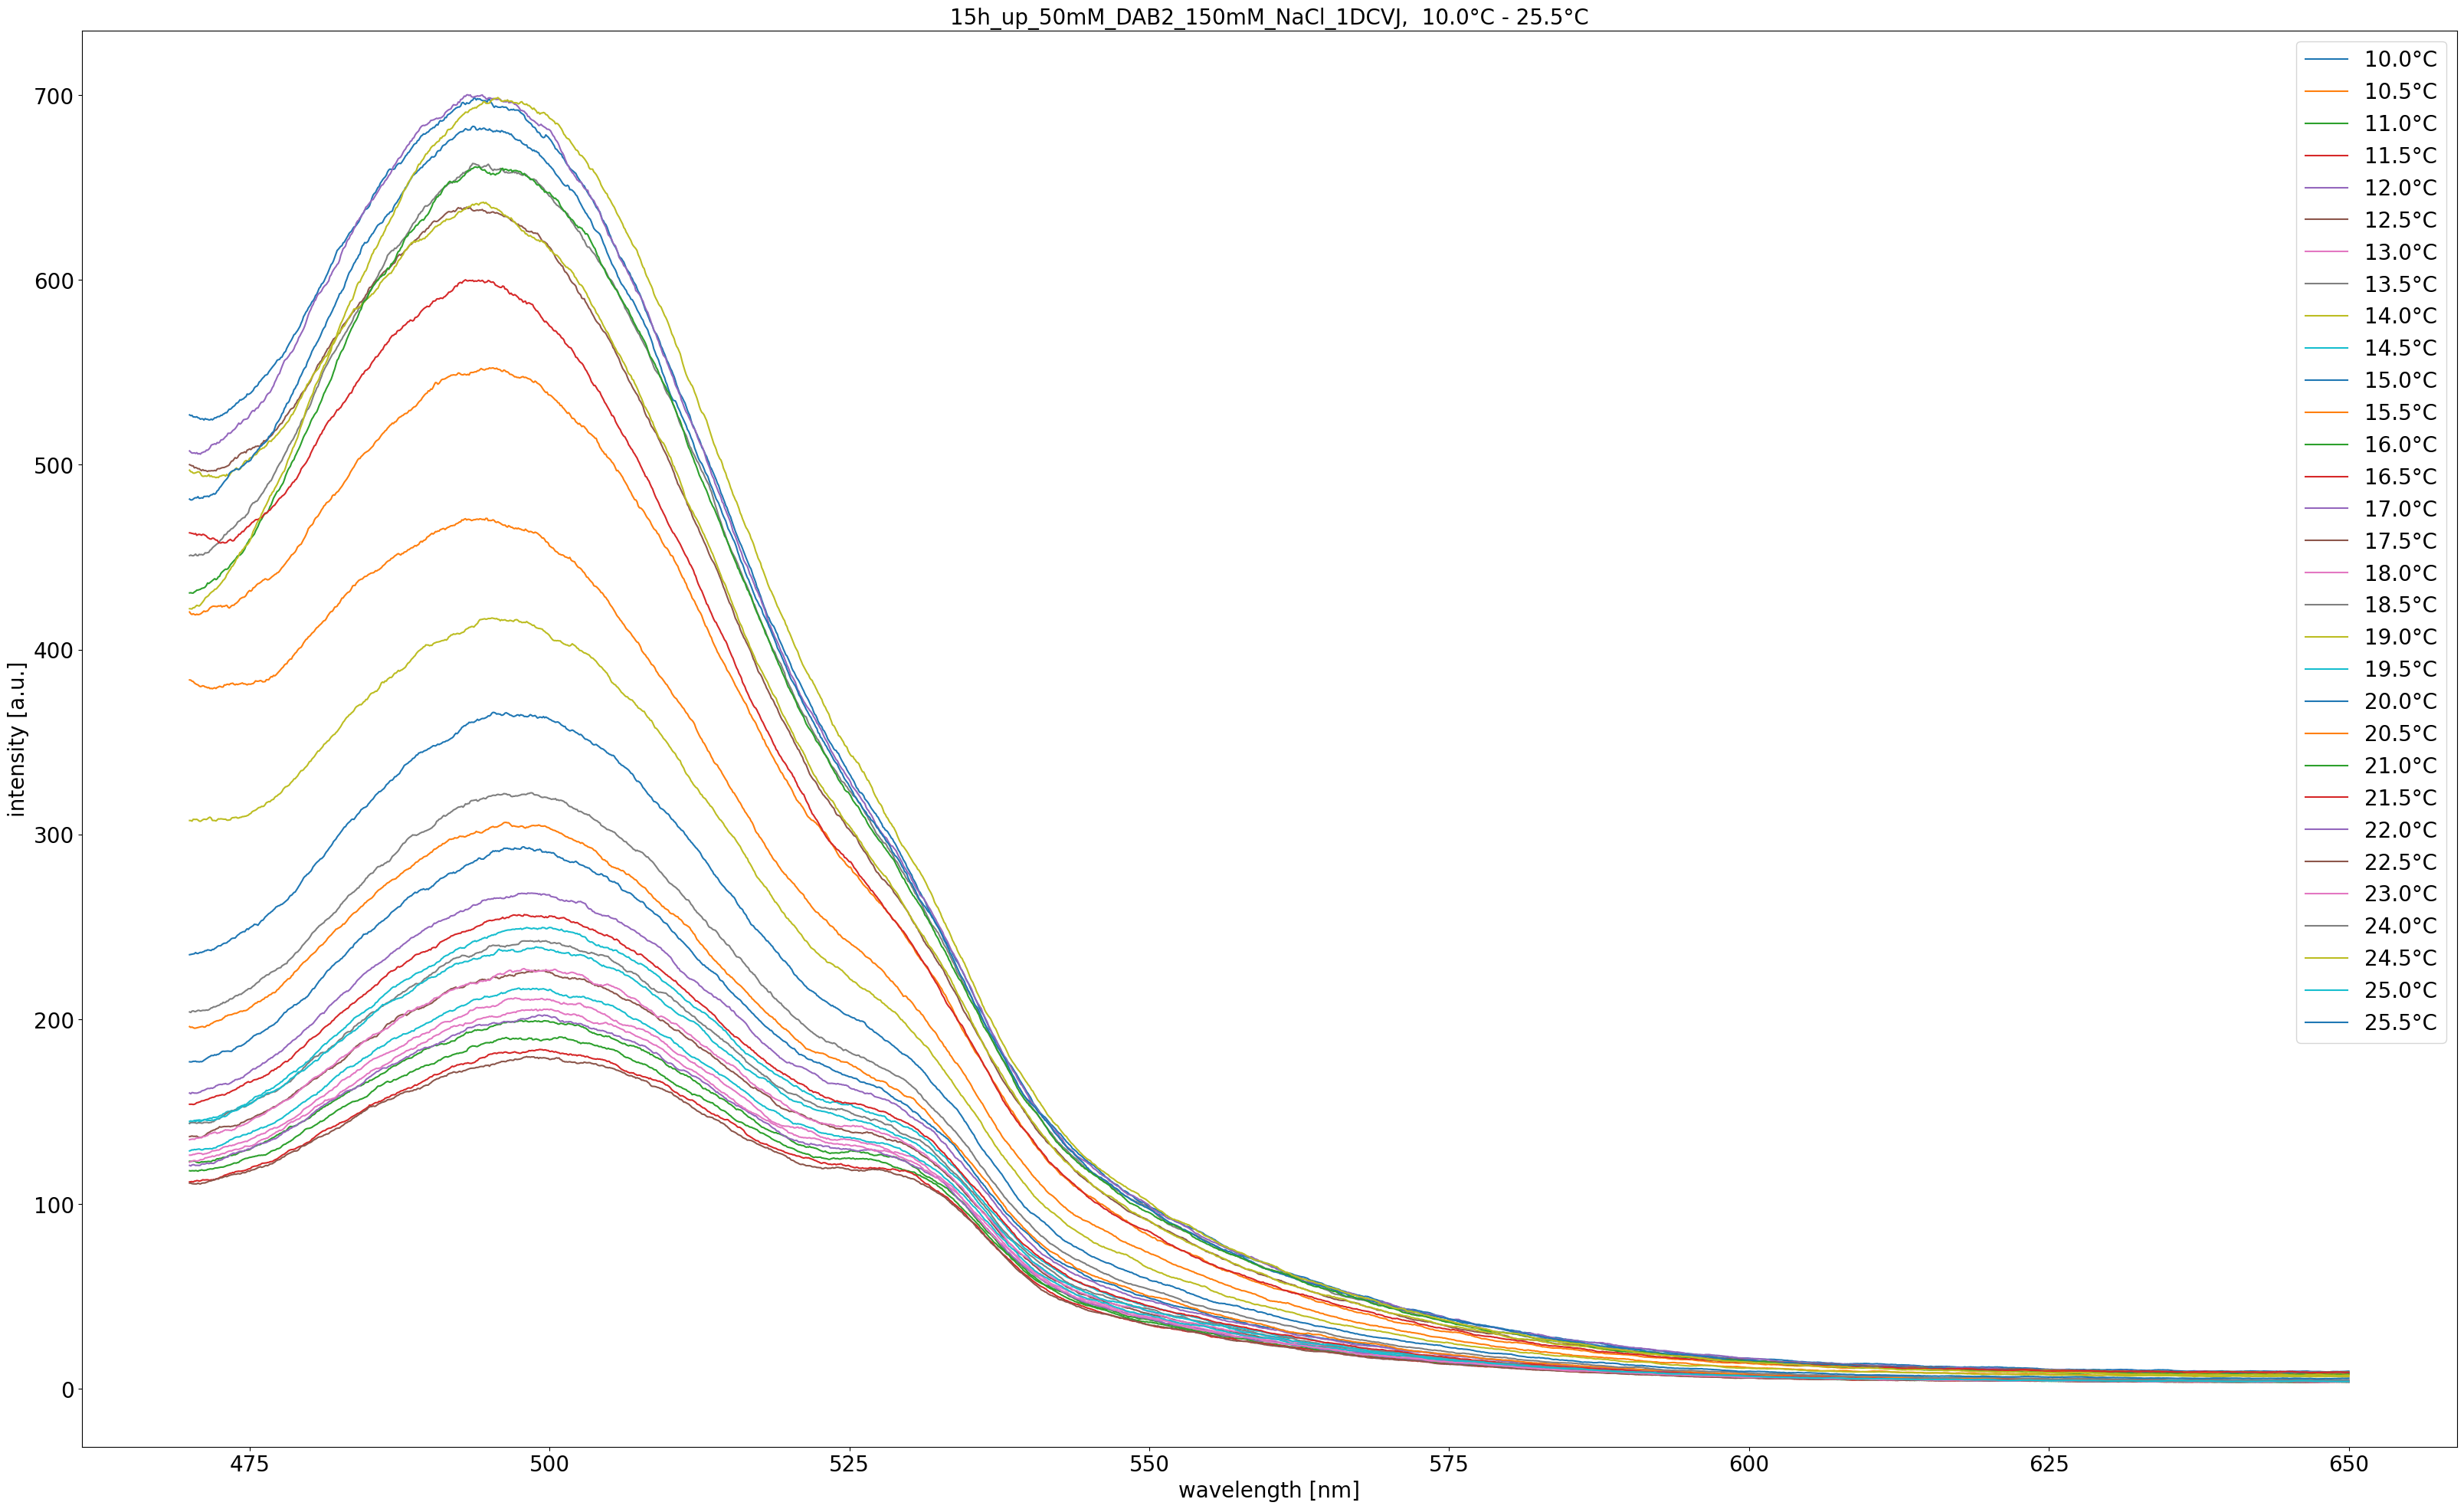

In [7]:
# Set the directory where your data files are located
data_dir = '/home/jwm/data/JASCO_FP_6500_Spectrofluorometer/2024april13_50mM_DAB2_418_630_150mM_NaCl_1DCVJ_slow_hysteresis/'

# Set the number of the first and last spectrum to use in the plot -1
first_spectrum = 0
last_spectrum = 31

# Function to load (x, y) data from txt file starting from the 19th line
def load_data(file_path):
    return np.loadtxt(file_path, skiprows=18)

# Get all txt files in the directory
data_files = glob.glob(data_dir + "*.txt")

# Initialize a list to store loaded data
loaded_data = []

# Initialize a list to store titles
titles = []

# Initialize variables for baseline data
baseline_data = None
baseline_title = None

# Load data from each file
for file_path in data_files:
    loaded_data.append(load_data(file_path))
    
    # Extract 6th to 4th last digits from file name and use as title
    title = file_path.split('/')[-1].split('.')[0][-6:-4]
    titles.append(title)
    
# Check if file name contains "999" and assign it as baseline data
    if "999" in file_path:
        baseline_data = loaded_data[-1]
        baseline_title = title

# Sort the files by their title
data_files.sort(key=lambda x: int(x.split('/')[-1].split('.')[0][-6:-4]))


# Convert extracted digits back to temperature values
temperatures = [10 + i * 0.5 for i in range(len(titles))]

# Deduce baseline from all other data
#for i, data in enumerate(loaded_data):
#    if titles[i] != baseline_title:
#       data[:, 1] -= baseline_data[:, 1]

# Find temperatures of the first and last spectrum
first_temp = 10 + first_spectrum * 0.5
last_temp = 10 + last_spectrum * 0.5


# Plot selected data in a single plot
plt.figure(figsize=(40, 24))
for title in titles[first_spectrum:last_spectrum + 1]:  # Loop through the selected spectra using titles as indices
    i = titles.index(title)
    data = loaded_data[i]
    if data is not baseline_data:
        plt.plot(data[:, 0], data[:, 1], label=f'{temperatures[i]}°C')
    
plt.xlabel('wavelength [nm]', fontsize=20)
plt.ylabel('intensity [a.u.]', fontsize=20)

# Set title using first and last label in legend
first_label = f"{temperatures[0]}°C" if temperatures else ""
last_label = f"{temperatures[-1]}°C" if temperatures else ""

# Set title using first and last spectrum temperature
plt.title(f'15h_up_50mM_DAB2_150mM_NaCl_1DCVJ,  {first_temp}°C - {last_temp}°C', fontsize=20)

# Adjust font size of grid numbers on axes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)
plt.grid(True)


# Replace spaces in the title with underscores for the filename
title_for_filename = f'15h_Temperature_Series_{first_temp}°C_{last_temp}°C'.replace(' ', '_')

# Extract directory path from one of the data file paths
output_dir = os.path.dirname(data_files[0])

# Check if the file already exists
output_file = os.path.join(output_dir, f'{title_for_filename}.svg')
if os.path.exists(output_file):
    os.remove(output_file)

# Save the plot in the same directory as the data files
plt.savefig(os.path.join(output_dir, f'{title_for_filename}.svg'), format='svg')

plt.grid(False)
save_path = os.path.join(figure_dir, '1_raw_spectra.svg')
print(save_path)
plt.savefig(save_path)   


plt.show()

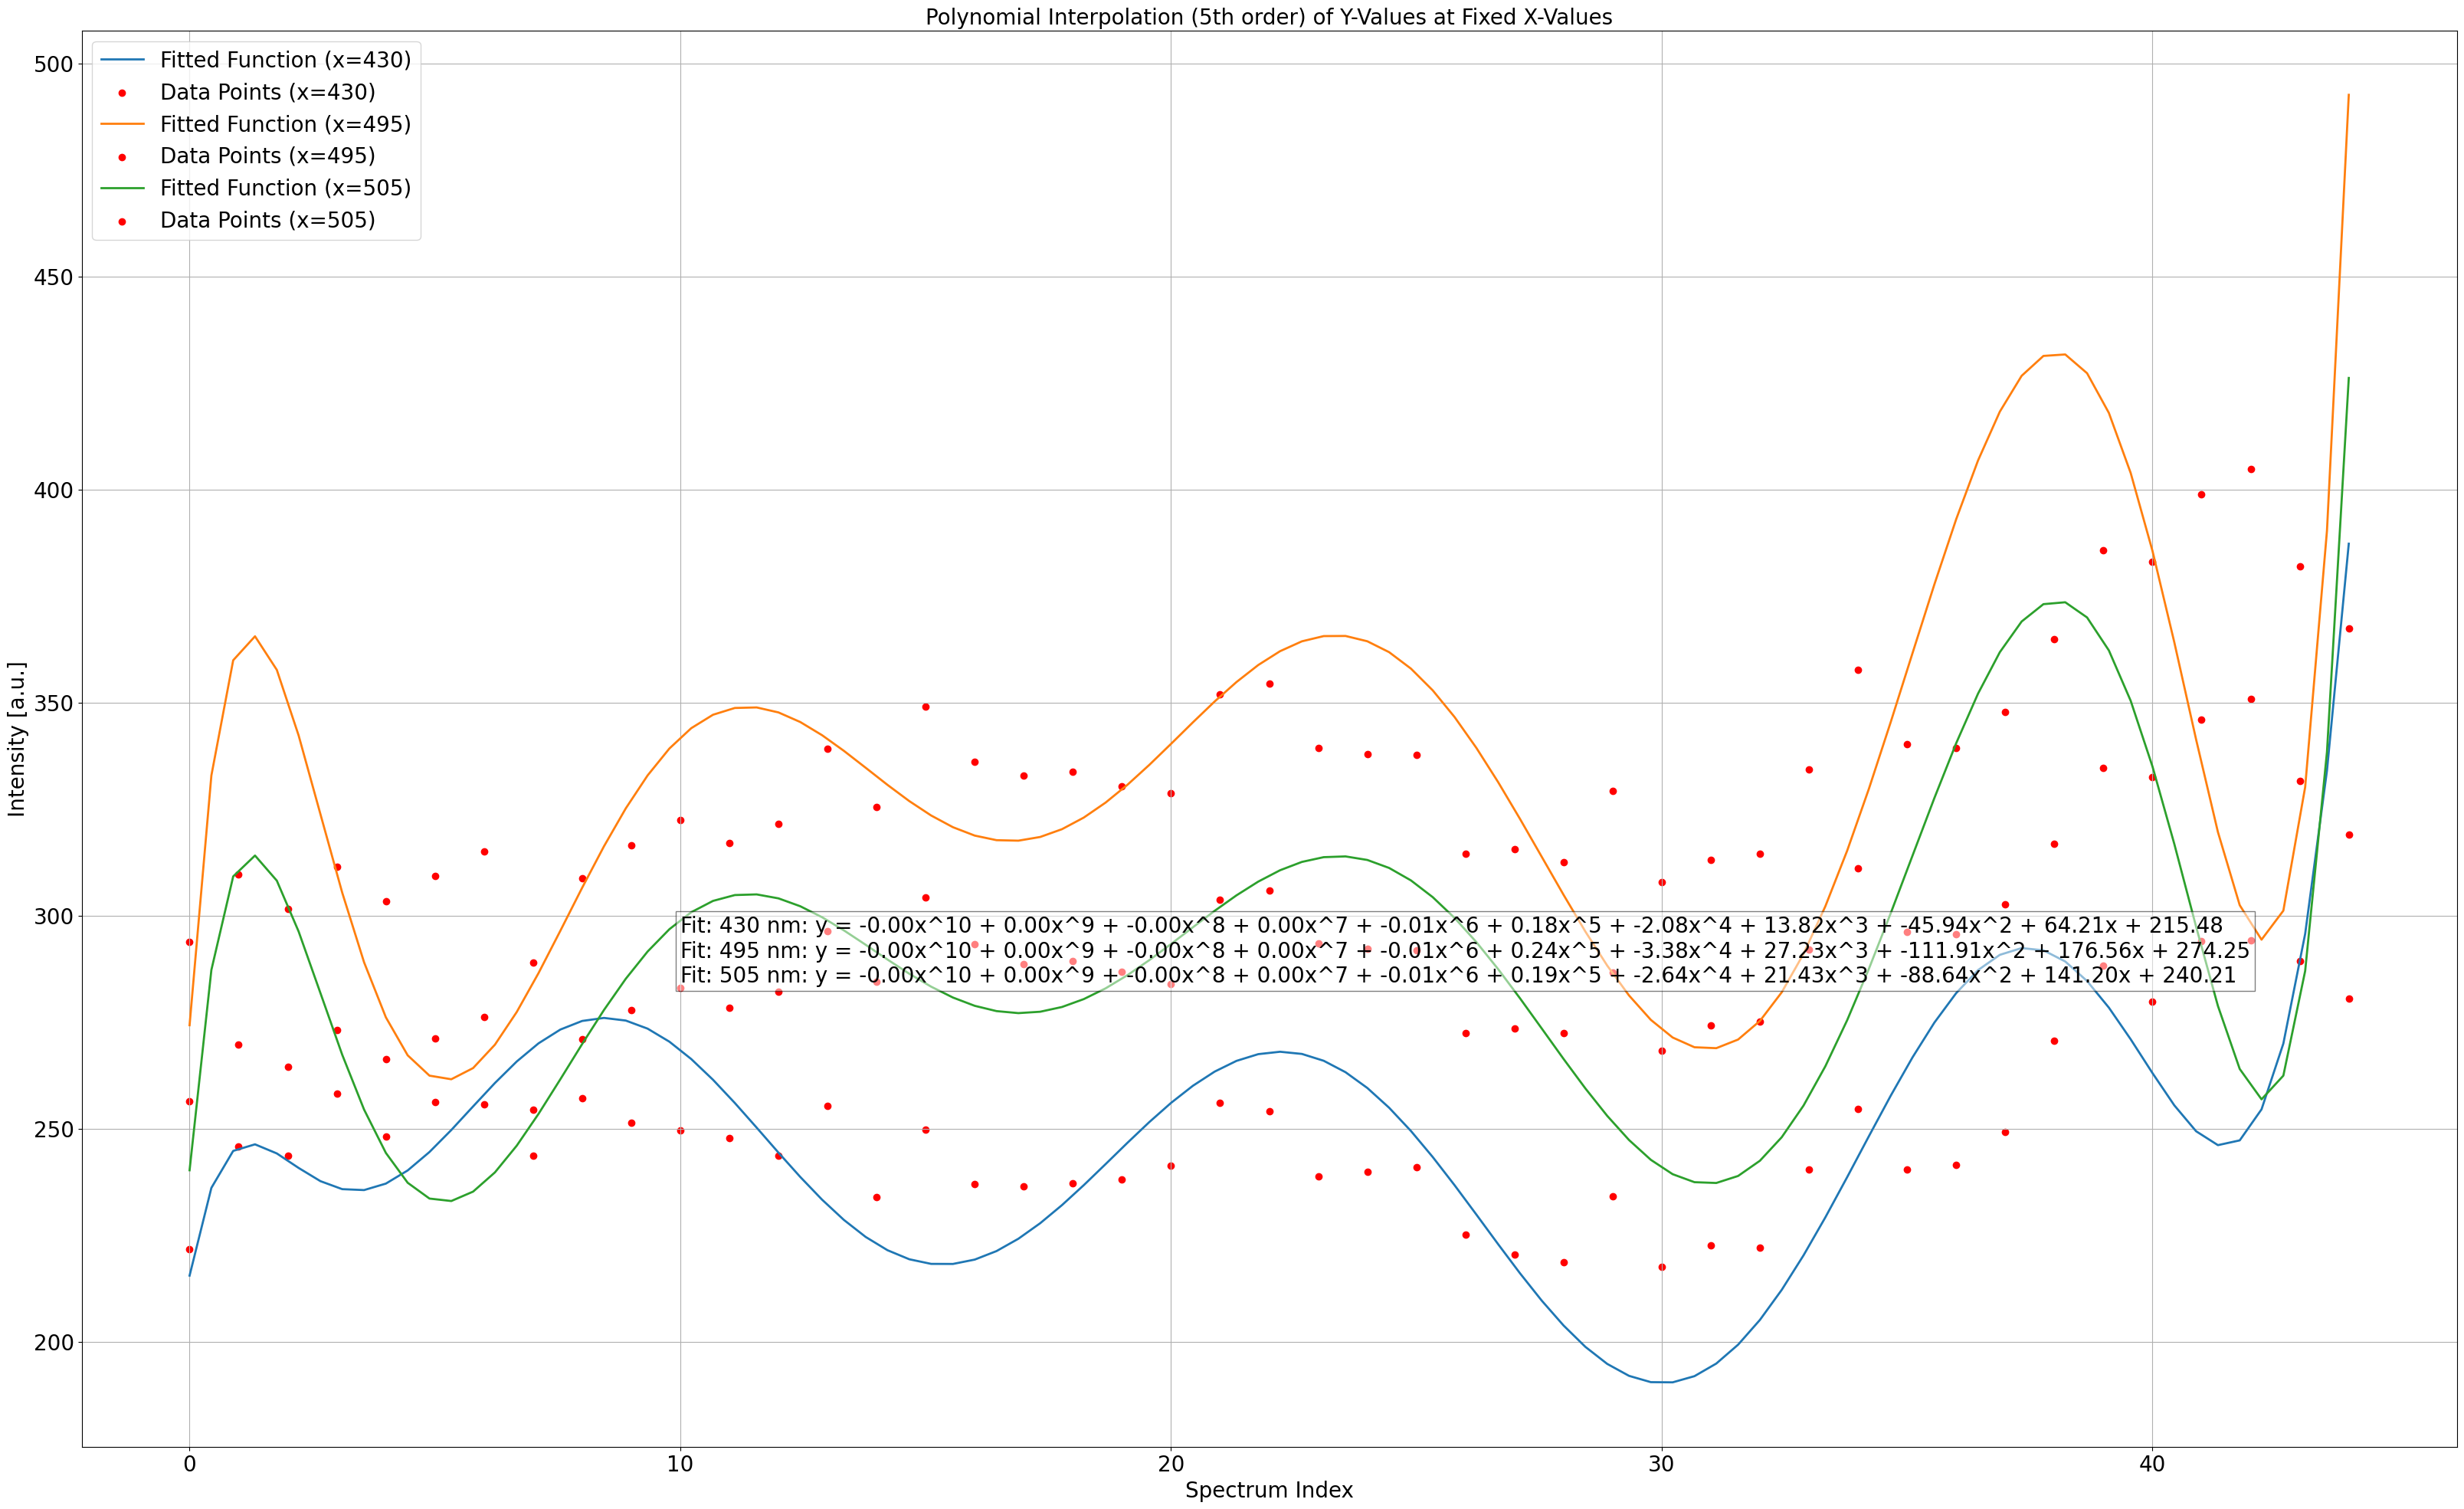

In [13]:
# Define the four x-values
x_values = [430, 495, 505]

# Initialize lists to store y-values for each x-value for all spectra
y_values_all = [[] for _ in range(len(x_values))]

# Iterate through spectra between the first and last
for i, data in enumerate(loaded_data[first_spectrum:last_spectrum+1]):
    # Iterate through each specified x-value
    for j, x in enumerate(x_values):
        # Find the index of the closest x-value in the dataset
        closest_index = np.argmin(np.abs(data[:, 0] - x))
        # Extract the corresponding y-value
        y_value = data[closest_index, 1]
        # Store the y-value
        y_values_all[j].append(y_value)

# Plot selected data in a single plot
#plt.figure(figsize=(40, 24))
#for i, data in enumerate(loaded_data[0:45]):  # Loop through the first 45 data files
#    if data is not baseline_data:
#        plt.plot(data[:, 0], data[:, 1], label=f'{temperatures[i]}°C')

# Iterate through spectra between the first and last
#for i, data in enumerate(loaded_data[first_spectrum:last_spectrum+1]):
    # Extract y-values at the specified x-values
 #   y_values = [np.interp(x, data[:, 0], data[:, 1]) for x in x_values]
    # Store y-values for each x-value
  #  for j, y in enumerate(y_values):
   #     y_values_all[j].append(y)

# Plot polynomial interpolation for each x-value
#plt.figure(figsize=(40, 24))
#for i, x in enumerate(x_values):
    # Calculate mean of 5 surrounding points for each x-value
 #   mean_values = [np.mean(y_values_all[i][max(0, j-5):min(len(y_values_all[i]), j+6)]) for j in range(len(y_values_all[i]))]

    # Plot data points
#    plt.scatter(range(len(mean_values)), mean_values, label=f'Data Points (x={x})', color='red')
    
    # Perform polynomial interpolation
   # coeffs = np.polyfit(range(len(mean_values)), mean_values, 5)
  #  poly = np.poly1d(coeffs)
 #   x_values_interp = np.linspace(0, len(mean_values) - 1, 100)
#    y_values_interp = poly(x_values_interp)
    
    # Plot interpolation curve
#    plt.plot(x_values_interp, y_values_interp, label=f'x={x}', linewidth=2)

# Define the position of the box
box_x = 10
box_y = 300
    
    # Display the equation of the fitted polynomial
  #  equation = f'Fitted Function (x={x}): y = {coeffs[0]:.2f}x^5 + {coeffs[1]:.2f}x^4 + {coeffs[2]:.2f}x^3 + {coeffs[3]:.2f}x^2 + {coeffs[4]:.2f}x + {coeffs[3]:.2f}'
   # plt.text(0.5, np.mean(mean_values)+20, equation, fontsize=20, verticalalignment='bottom')


# Display equations in a box
equation_box = ""
#for i, x in enumerate(x_values):
#    equation = f'Fit: {x} nm: y = {coeffs[0]:.2f}x^5 + {coeffs[1]:.2f}x^4 + {coeffs[2]:.2f}x^3 + {coeffs[3]:.2f}x^2 + {coeffs[4]:.2f}x + {coeffs[3]:.2f}'
#    equation_box += equation
#    if i < len(x_values) - 1:
#        equation_box += '\n'  # Add newline character except for the last equation
#plt.text(box_x, box_y, equation_box, fontsize=20, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Plot polynomial interpolation for each x-value
plt.figure(figsize=(40, 24))
equation_box = ""
for i, x in enumerate(x_values):
    # Calculate mean of 5 surrounding points for each x-value
    mean_values = [np.mean(y_values_all[i][max(0, j-5):min(len(y_values_all[i]), j+6)]) for j in range(len(y_values_all[i]))]

    # Construct polynomial function and get coefficients
    #coeffs = np.polyfit(range(len(mean_values)), mean_values, 10)    
    coeffs = np.polyfit(range(len(y_values_all[i])), y_values_all[i], 10)

    poly = np.poly1d(coeffs)

    # Construct equation string
    equation = f'Fit: {x} nm: y = {coeffs[0]:.2f}x^10 + {coeffs[1]:.2f}x^9 + {coeffs[2]:.2f}x^8 + {coeffs[3]:.2f}x^7 + {coeffs[4]:.2f}x^6 + {coeffs[5]:.2f}x^5 + {coeffs[6]:.2f}x^4 + {coeffs[7]:.2f}x^3 + {coeffs[8]:.2f}x^2 + {coeffs[9]:.2f}x + {coeffs[10]:.2f}'
    equation_box += equation
    if i < len(x_values) - 1:
        equation_box += '\n'  # Add newline character except for the last equation
    
    x_values_interp = np.linspace(0, len(mean_values) - 1, 100)
    y_values_interp = poly(x_values_interp)
    
    # Plot interpolation curve
    plt.plot(x_values_interp, y_values_interp, label=f'Fitted Function (x={x})', linewidth=2)

    # Plot data points
    plt.scatter(range(len(mean_values)), mean_values, label=f'Data Points (x={x})', color='red')

# Display equations in a box
plt.text(box_x, box_y, equation_box, fontsize=20, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


plt.xlabel('Spectrum Index', fontsize=20)
plt.ylabel('Intensity [a.u.]', fontsize=20)
plt.title('Polynomial Interpolation (5th order) of Y-Values at Fixed X-Values', fontsize=20)
plt.legend(fontsize=20)
# Adjust font size of grid numbers on axes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid(True)
plt.show()


In [63]:
# Set the directory where your data files are located
data_dir = '/home/jwm/data/JASCO_FP_6500_Spectrofluorometer/2024april17_50mM_DAB2_418_630_150mM_NaCl_nodye_slow_hysteresis/'

# Set the number of the first and last spectrum to use in the plot -1
first_spectrum = 0
last_spectrum = 44

# Function to load (x, y) data from txt file starting from the 19th line
def load_data(file_path):
    return np.loadtxt(file_path, skiprows=18)

# Get all txt files in the directory
data_files = glob.glob(data_dir + "*.txt")

# Initialize a list to store loaded data
loaded_data = []

# Initialize a list to store titles
titles = []

# Initialize variables for baseline data
baseline_data = None
baseline_title = None

# Load data from each file
for file_path in data_files:
    loaded_data.append(load_data(file_path))
    
    # Extract 6th to 4th last digits from file name and use as title
    title = file_path.split('/')[-1].split('.')[0][-6:-4].lstrip('0')
    titles.append(title)
    
# Check if file name contains "999" and assign it as baseline data
    if "999" in file_path:
        baseline_data = loaded_data[-1]
        baseline_title = title

# Convert extracted digits back to temperature values
temperatures = [10 + i * 0.5 for i in range(len(titles))]